<a href="https://colab.research.google.com/github/gabriel-reis12/Vendas_cafe/blob/main/Vendas_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arrumando dados

In [1]:
import pandas as pd

In [2]:
#Lê o arquivo CSV 'index.csv' e armazena no DataFrame `df`.
df = pd.read_csv('index.csv')

In [3]:
#Exibe as primeiras linhas do DataFrame para verificar a estrutura dos dados.
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
#Exibe os tipos de dados de cada coluna.
df.dtypes

,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [5]:
#Renomeia as colunas do DataFrame para facilitar a compreensão e o uso.
df = df.rename(columns={'date': 'Data', 'datetime':'Hora', 'cash_type': 'Tipo_moeda', 'card':'Cartao', 'money':'Dinheiro', 'coffee_name':'Nome_Cafe'})

##Arrumando Variáveis

In [7]:
# Converte a coluna 'Data' para o formato de data.
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [8]:
# Verifica os tipos de dados novamente após a conversão.
df.dtypes

,0
Data,datetime64[ns]
Hora,object
Tipo_moeda,object
Cartao,object
Dinheiro,float64
Nome_Cafe,object


In [9]:
# Converte a coluna 'Hora' para um formato datetime.
df['Hora'] = pd.to_datetime(df['Hora'])

In [10]:
# Extrai apenas a parte da hora (sem data) e armazena na coluna 'Hora'.
df['Hora'] = df['Hora'].dt.time

In [11]:
# Exibe as primeiras linhas do DataFrame para verificar as mudanças.
df.head()

,Data,Hora,Tipo_moeda,Cartao,Dinheiro,Nome_Cafe
0,2024-03-01,10:15:50.520000,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19:22.539000,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20:18.089000,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46:33.006000,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48:14.626000,card,ANON-0000-0000-0004,38.7,Latte


In [12]:
# Exibe novamente os tipos de dados após todas as conversões.
df.dtypes

,0
Data,datetime64[ns]
Hora,object
Tipo_moeda,object
Cartao,object
Dinheiro,float64
Nome_Cafe,object


In [14]:
# Mostra as dimensões do DataFrame (número de linhas e colunas).
df.shape

(2026, 6)

In [15]:
 # Exibe os valores únicos na coluna 'Nome_Cafe' para ver os tipos de café disponíveis.
df.Nome_Cafe.unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

##Separando os Cafés

In [58]:
# Conta as vendas de cada tipo de café e cria um DataFrame com os resultados.
cafes = df.Nome_Cafe.value_counts().reset_index()

In [59]:
# Renomeia as colunas para 'Nome_Cafe' e 'Vendas_Totais' para facilitar a leitura.
cafes.columns = ['Nome_Cafe', 'Vendas_Totais']

In [60]:
# Exibe o DataFrame `cafes` com o nome dos cafés e o total de vendas.
cafes

,Nome_Cafe,Vendas_Totais
0,Americano with Milk,492
1,Latte,473
2,Cappuccino,297
3,Americano,270
4,Cortado,202
5,Hot Chocolate,136
6,Espresso,81
7,Cocoa,75


##Tipo de Moedas

In [18]:
# Exibe os tipos únicos de moeda (como cartão e dinheiro) usados nas vendas.
df.Tipo_moeda.unique()

array(['card', 'cash'], dtype=object)

In [19]:
# Conta a frequência de cada tipo de moeda e cria um DataFrame com os resultados.
moedas = df.Tipo_moeda.value_counts().reset_index()

In [20]:
# Exibe o DataFrame `moedas` com cada tipo de moeda e a contagem de vendas associadas.
moedas

,Tipo_moeda,count
0,card,1937
1,cash,89


##Vendas por dia

In [21]:
# Conta o número de vendas por dia e cria um DataFrame com os resultados.
vendas = df.Data.value_counts().reset_index()

In [22]:
# Renomeia as colunas para 'Data' e 'Vendas'.
vendas.columns = ['Data', 'Vendas']

In [23]:
# Exibe o DataFrame `vendas` com a data e o número total de vendas.
vendas

,Data,Vendas
0,2024-10-11,26
1,2024-09-22,24
2,2024-07-30,24
3,2024-09-17,23
4,2024-09-07,22
...,...,...
226,2024-08-29,1
227,2024-08-27,1
228,2024-05-08,1
229,2024-07-15,1


In [24]:
# Encontra o valor máximo de vendas em um único dia.
maior_venda = vendas.Vendas.max()

In [25]:
# Identifica a data com o maior número de vendas.
data_maior_venda = vendas.loc[vendas['Vendas'].idxmax(), 'Data']

In [26]:
# Exibe a data com mais vendas e o total de vendas.
print(f"A data com mais vendas foi: {data_maior_venda.date()} \nO número de vendas foi: {maior_venda}")

A data com mais vendas foi: 2024-10-11 
O número de vendas foi: 26


##Produtos vendidos na data de maior venda

In [27]:
# Filtra o DataFrame para a data com mais vendas e conta as vendas de cada café nesse dia.
produto_maior_venda = df.loc[df['Data'] == data_maior_venda, 'Nome_Cafe'].value_counts().reset_index()

In [28]:
# Exibe o DataFrame `produto_maior_venda` com o nome dos cafés e o número de vendas para a data de maior venda.
produto_maior_venda

,Nome_Cafe,count
0,Americano with Milk,5
1,Latte,5
2,Hot Chocolate,5
3,Americano,5
4,Cocoa,3
5,Cortado,2
6,Cappuccino,1


##Média de vendas por itens

In [43]:
# Conta a média de vendas por café em cada dia.
media_cafe_dia = df.groupby(['Data','Nome_Cafe'])['Dinheiro'].count().reset_index()

In [75]:
# Renomeia as colunas para facilitar a leitura.
media_cafe_dia.columns = ['Data', 'Nome_Cafe', 'Vendas']

In [51]:
# Exibe as vendas de café para o dia especificado.
media_cafe_dia.loc[media_cafe_dia['Data'] == '2024-03-01'] #Altere a data para ver as vendas no dia que você quer

,Data,Nome_Cafe,Vendas
0,2024-03-01,Americano,1
1,2024-03-01,Americano with Milk,4
2,2024-03-01,Cocoa,1
3,2024-03-01,Hot Chocolate,3
4,2024-03-01,Latte,2


##Gráfico 1

In [54]:
import matplotlib.pyplot as plt

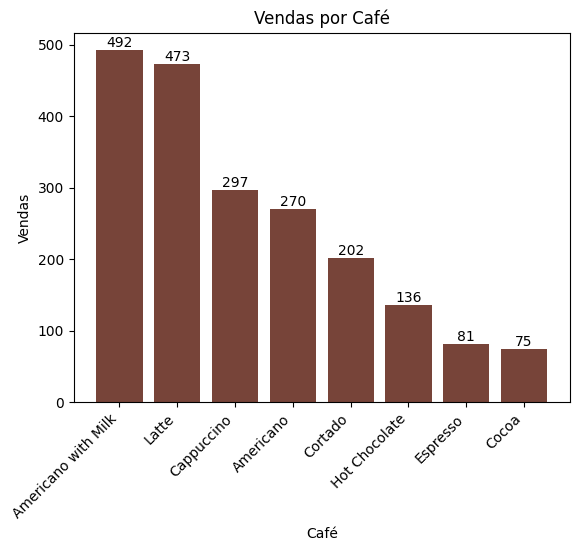

In [74]:
# Cria um gráfico de barras das vendas totais por tipo de café com cor personalizada.
bars = plt.bar(cafes['Nome_Cafe'], cafes['Vendas_Totais'], color='#774439')
plt.title('Vendas por Café')
plt.xlabel('Café', fontsize=10)
plt.ylabel('Vendas')
for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra (valor de vendas)
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x centralizada
        yval,  # Posição y logo acima da barra
        f'{yval}',  # Texto do rótulo
        ha='center',  # Alinhamento horizontal centralizado
        va='bottom'   # Alinhamento vertical na parte inferior do texto
    )
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para evitar sobreposição.
plt.show()

##Gráfico 2

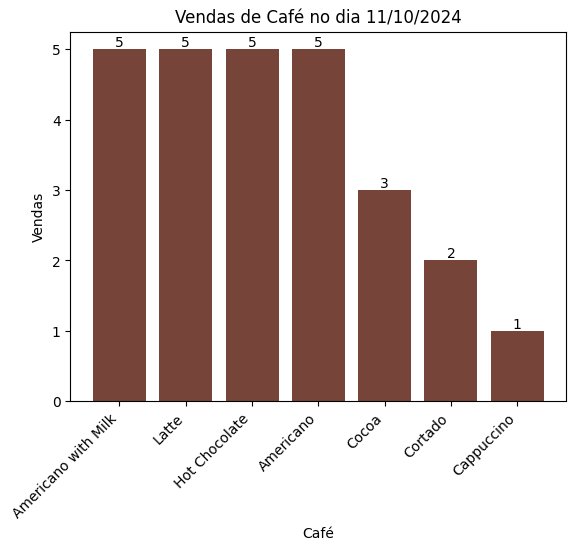

In [73]:
# Cria um gráfico de barras para as vendas de cada café na data com mais vendas.
bars = plt.bar(produto_maior_venda['Nome_Cafe'], produto_maior_venda['count'], color='#774439')
plt.title('Vendas de Café no dia 11/10/2024')
plt.xlabel('Café', fontsize=10)
plt.ylabel('Vendas')
for bar in bars:
    yval = bar.get_height()  # Obtém a altura da barra (valor de vendas)
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x centralizada
        yval,  # Posição y logo acima da barra
        f'{yval}',  # Texto do rótulo
        ha='center',  # Alinhamento horizontal centralizado
        va='bottom'   # Alinhamento vertical na parte inferior do texto
    )
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para evitar sobreposição.
plt.show()